In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import csf_list
import _image_processing
import _image_curve

In [19]:
import importlib
importlib.reload(concave_enclosed_csf_list)

<module 'concave_enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\concave_enclosed_csf_list.py'>

In [3]:
sil_path = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\lib\silhouettes\geographic"

In [4]:
sil_files = os.listdir(sil_path)

In [5]:
images = [_image_processing.load_image(os.path.join(sil_path, file)) for file in sil_files]

In [6]:
open_images = [_image_processing.open_image(image, 5) for image in images]

In [7]:
image_curves = [_image_curve.ImageCurve(image).curve() for image in open_images]

In [35]:
ecsf = concave_enclosed_csf_list.ConcaveEnclosedCSFList(image_curves[0], step_size=0.05, refresh_interval=500)

In [36]:
ecsf.run()

Iteration: 0, Concavity:  1449.90, Area to original %:  100.00
Iteration: 500, Concavity:  22.61, Area to original %:  97.41
Iteration: 1000, Concavity:  14.44, Area to original %:  95.04
Iteration: 1500, Concavity:  10.71, Area to original %:  92.84
Iteration: 2000, Concavity:  8.70, Area to original %:  90.81
Iteration: 2500, Concavity:  7.55, Area to original %:  88.88
Iteration: 3000, Concavity:  6.77, Area to original %:  87.06
Iteration: 3500, Concavity:  6.23, Area to original %:  85.34
Iteration: 4000, Concavity:  8.07, Area to original %:  83.59
Iteration: 4500, Concavity:  8.10, Area to original %:  81.69
Iteration: 5000, Concavity:  2.84, Area to original %:  80.14
Iteration: 5500, Concavity:  1.95, Area to original %:  78.35
Iteration: 6000, Concavity:  1.26, Area to original %:  76.19
Iteration: 6500, Concavity:  0.78, Area to original %:  73.83
Iteration: 7000, Concavity:  0.50, Area to original %:  71.45
Iteration: 7500, Concavity:  0.30, Area to original %:  69.07
Itera

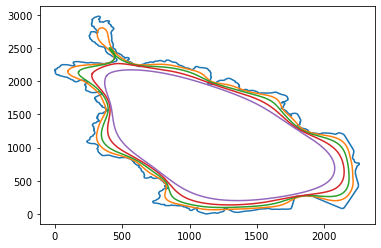

In [37]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]

In [39]:
csf = csf_list.CSFList(ecsf.curves[-1])

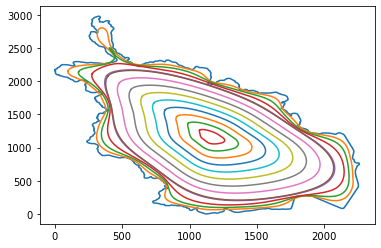

In [41]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]
_ = [plt.plot(*curve.transpose()) for curve in csf.linspace_subsets_resample(10)]